In [5]:
import nibabel as nib
import numpy as np
import pandas as pd
#from keras.src.backend.jax.numpy import linspace
from nilearn import image as nimg
from nilearn import plotting as nplot
from nilearn import masking as nimask
from nibabel.processing import resample_to_output
from matplotlib import pyplot as plt
import pickle
import os
from nilearn.image import resample_img
from vtkmodules.util.colors import blue_medium

In [6]:
#LOADING IN
#one preprocessed scan
fmri_test_path = "NYU_0050970_func_preproc.nii"
#nibable image

abide_fmri_image_path = 'C:/Users/ahmm9/OneDrive - ITU/ITU/Research_proj/prepros_data/Outputs/ccs/filt_global/func_preproc'
adhd200_fmri_image_path = 'C:/Users/ahmm9/OneDrive - ITU/ITU/Research_proj/Adhd200_preproc/NYU_preproc'
#fmri_image_path = '../../DATA/pre_proc_ABIDE1/func_preproc'
img = nib.load(fmri_test_path).get_fdata()

print(img.shape)
print(f"The .nii files are stored in memory as numpy's: {type(img)}.")

#parcellation mask
mask_path = 'Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii'
img2 = nib.load(mask_path).get_fdata()
img2.shape


(61, 73, 61, 175)
The .nii files are stored in memory as numpy's: <class 'numpy.memmap'>.


(256, 256, 256, 1)

Plot data and mask

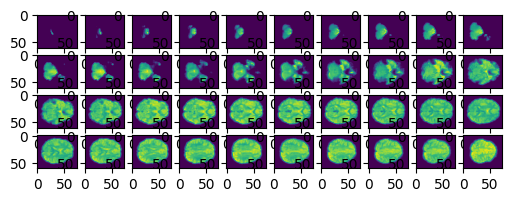

In [7]:
#frmi image
plt.style.use('default')
fig, axes = plt.subplots(4, 10, figsize=(6, 2))
for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(img[:, :, i, 0])
plt.show()

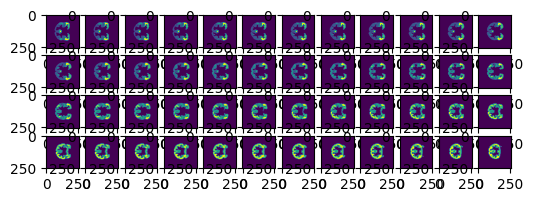

In [8]:
#Mask
plt.style.use('default')
fig, axes = plt.subplots(4, 12, figsize=(6, 2))
for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(img2[:, :, 125 + i, 0])  
    # Start from the 31st image (index 30)#TODO still this with different indexing??
plt.show()


In [9]:
#load with NILearn
abide_ni_image = nimg.load_img(fmri_test_path)
adhd200_ni_image = nimg.load_img("sfnwmrda0010001_session_1_rest_1.nii")
ni_mask = nimg.load_img(mask_path)
print(abide_ni_image.shape)
print(adhd200_ni_image.shape)
print(ni_mask.shape)
print(ni_mask.affine)

(61, 73, 61, 175)
(49, 58, 47, 172)
(256, 256, 256, 1)
[[  -1.    0.    0.  127.]
 [   0.    0.    1. -145.]
 [   0.   -1.    0.  147.]
 [   0.    0.    0.    1.]]


In [10]:
print(abide_ni_image.affine)
print(adhd200_ni_image.affine)

[[  -3.   -0.   -0.   90.]
 [  -0.    3.   -0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
[[  -4.   -0.   -0.   96.]
 [  -0.    4.   -0. -132.]
 [   0.    0.    4.  -70.]
 [   0.    0.    0.    1.]]


In [11]:
print(abide_ni_image.slicer[:,:,:,5].get_fdata().shape)
print(abide_ni_image.slicer[:,:,:,5].get_fdata()[30:40, 30:40, 30])

print(adhd200_ni_image.slicer[:, :, :, 5].get_fdata().shape)
print(adhd200_ni_image.slicer[:, :, :, 5].get_fdata()[30:40, 30:40, 30])

(61, 73, 61)
[[ 9811.43945312 10097.35546875 10958.30371094 11560.92578125
  11672.24121094 11102.453125    9737.27050781  8766.56738281
  10013.00683594 11268.17773438]
 [10105.62207031 10725.42578125 11403.30957031 12275.43066406
  12242.43066406 12802.26269531 12641.40039062 10282.44433594
   8997.33203125  9750.62792969]
 [10276.03027344 11277.99316406 11954.30078125 12492.17089844
  12785.25976562 12648.55371094 13874.41601562 12480.94238281
   9403.14550781  8297.0859375 ]
 [10764.67871094 12130.37304688 12692.64550781 12734.65332031
  12817.96191406 12494.09472656 12599.54785156 13030.53125
   9758.62402344  8166.56298828]
 [12156.88671875 13874.81347656 14129.14160156 13268.98632812
  12755.27246094 11583.39355469 10728.71875     9884.04296875
   9391.34765625 10029.09960938]
 [14176.82910156 14644.71386719 14078.27929688 13040.88378906
  12226.53417969 11302.54199219 10658.92578125 10528.26269531
  11305.79101562 11818.70898438]
 [14939.33203125 14409.2421875  13412.44726562 1

In [12]:
adhd200_ni_image.slicer[:, :, :, 5].get_fdata()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

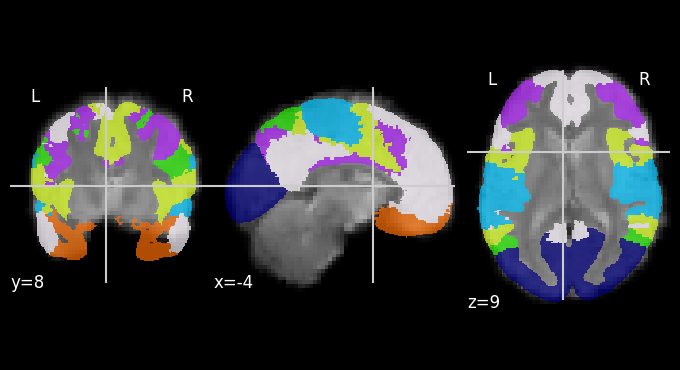

In [13]:
#show mask
nplot.plot_roi(ni_mask, abide_ni_image.slicer[:,:,:,30])


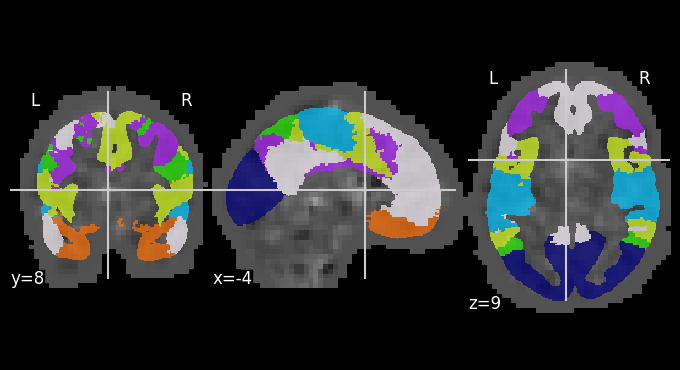

In [14]:
#show mask
nplot.plot_roi(ni_mask, adhd200_ni_image.slicer[:,:,:,30])


In [15]:
#nilearn reshape dims of mask to match
abide_reshaped_mask = nimg.resample_img(ni_mask,target_affine=abide_ni_image.affine, interpolation='nearest',target_shape=abide_ni_image.shape[:3])
adhd200_reshaped_mask = nimg.resample_img(ni_mask,target_affine=adhd200_ni_image.affine, interpolation='nearest',target_shape=adhd200_ni_image.shape[:3])
print(abide_reshaped_mask.shape)
print(adhd200_reshaped_mask.shape)

(61, 73, 61, 1)
(49, 58, 47, 1)


0.35001473701426444
0.1977820508542137


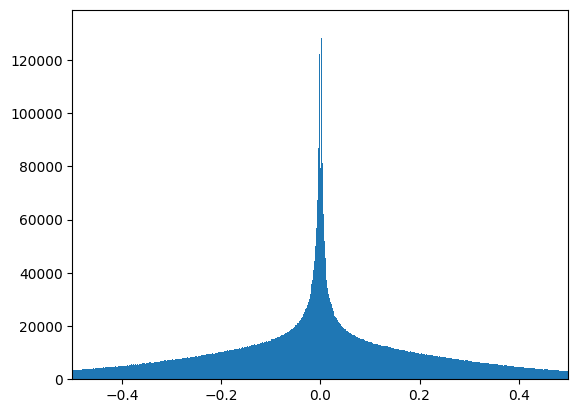

In [16]:
image_data = adhd200_ni_image.get_fdata()
thresh_ = 0.001
between_thresh = [i>thresh_ or i < -thresh_ for i in image_data.flatten()]
plt.hist(image_data.flatten()[between_thresh],bins = 10000);
plt.xlim(-0.5,0.5);
print(np.std(image_data.flatten()[between_thresh]))
print(np.std(image_data.flatten()))

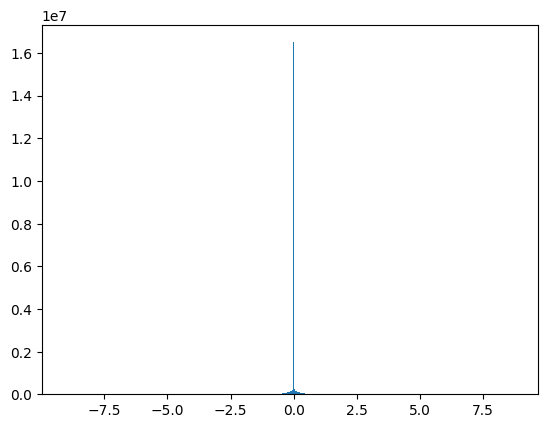

In [17]:
plt.hist(image_data.flatten(),bins = 1000);


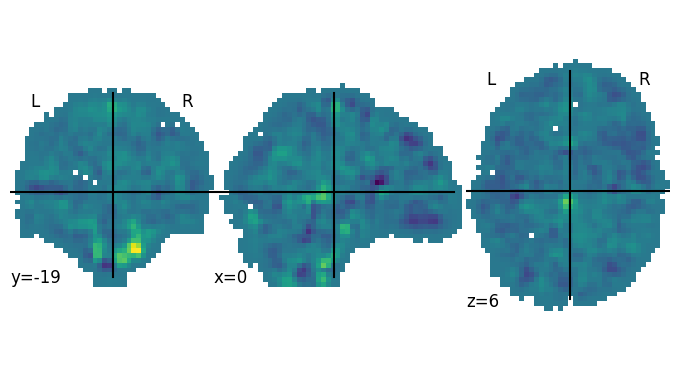

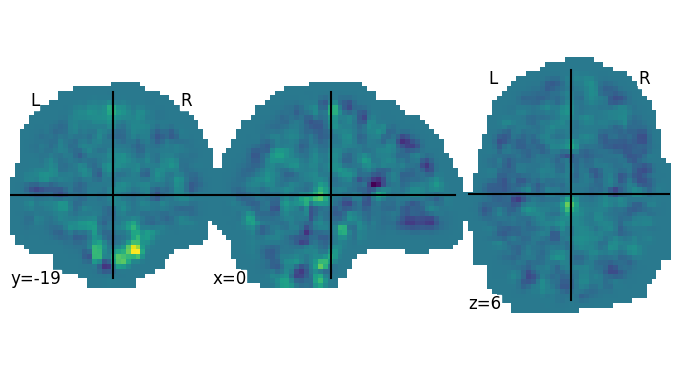

In [18]:
nplot.plot_img(adhd200_ni_image.slicer[:,:,:,20],threshold=0.001)
nplot.plot_img(adhd200_ni_image.slicer[:,:,:,20],threshold=0.0)

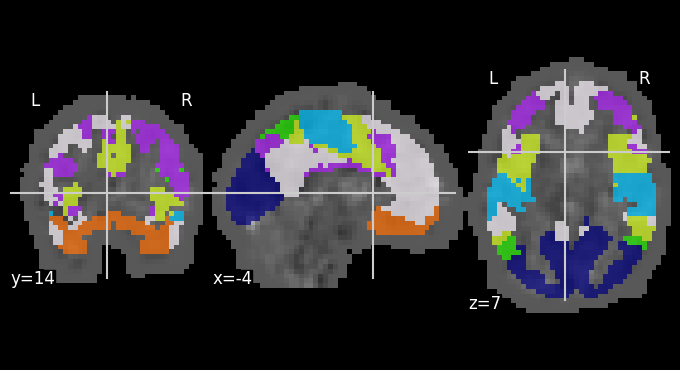

In [19]:
#plot the mask onto one slice of the frmi image
nplot.plot_roi(adhd200_reshaped_mask, adhd200_ni_image.slicer[:,:,:,5])

In [20]:
#creates a mask disctionary with separate the regions as keys and the region masks as values
def create_parcellation_masks(nifti_mask, nifti_image):
    data = nifti_mask.get_fdata().astype(int)
    # Create a dictionary to store each mask
    masks = {}
    for value in range(1, 8):
        masks[value] = nib.Nifti1Image((data == value).astype(float), nifti_image.affine) # Create a mask for each unique value
    return masks

abide_mask_dict = create_parcellation_masks(abide_reshaped_mask,abide_ni_image)
adhd200_mask_dict = create_parcellation_masks(adhd200_reshaped_mask,adhd200_ni_image)

print(abide_mask_dict[1].shape)
print(adhd200_mask_dict[1].shape)

(61, 73, 61, 1)
(49, 58, 47, 1)


In [21]:
mask_reasonable_shape = abide_mask_dict[1].get_fdata().astype(int)[:,:,:,0]
not_brain = (mask_reasonable_shape == 0).sum()
brain = (mask_reasonable_shape != 0).sum()
print(brain,not_brain) # not brain is relative to parcellation
print("percentage of brain masked",(brain/(brain+not_brain))*100,"%")

mask_reasonable_shape = adhd200_mask_dict[1].get_fdata().astype(int)[:,:,:,0]
not_brain = (mask_reasonable_shape == 0).sum()
brain = (mask_reasonable_shape != 0).sum()
print(brain,not_brain) # not brain is relative to parcellation
print("percentage of brain masked",(brain/(brain+not_brain))*100,"%")

6582 265051
percentage of brain masked 2.423122374674653 %
2772 130802
percentage of brain masked 2.075254166229955 %


In [22]:
#applies mask to image
def apply_mask(image,mask):
    output_dict = {}
    for i in range(1,8):
        stack = []
        masked = nimask.apply_mask(image, mask[i])
        row_check = masked[0][masked[0] != 0]
        for row in masked:
            masked_no_zeros = row[row != 0]
            # print(len(row_check))
            # print(len(masked_no_zeros))
            while len(masked_no_zeros) != len(row_check):
                mean_value = np.mean(row)
                print(masked_no_zeros.shape)
                masked_no_zeros = np.concatenate((masked_no_zeros,mean_value),axis=None)
            stack.append(masked_no_zeros)
        output_dict[i] = np.array(stack)
    return output_dict    

In [23]:
def compute_voxel_count_per_region(onescan_data):
    voxel_count = []
    for region in range(len(onescan_data.keys())):
        voxel_count.append(onescan_data[region+1].shape[1])
    return voxel_count


In [25]:
#get all images into list
all_images = []

#seg = pd.read_csv("ABIDE_phenotypic_NYU.csv")
labels = []

for phenotypic in os.listdir("selected_participants"):
    seg = pd.read_csv("selected_participants/"+phenotypic)
    print(phenotypic)
    if phenotypic.startswith("ABIDE_"):
        image_path = abide_fmri_image_path
        id_name = "SUB_ID"
        dx_name = "DX_GROUP"
        index_1 = 4
        index_2 = 11
        label_offset = 0
    else:
        image_path = adhd200_fmri_image_path
        id_name = "ScanDir ID"
        dx_name = "DX"
        index_1 = 8
        index_2 = 15
        label_offset = 10
    for filename in os.listdir(image_path):
        if filename.endswith('.nii') or filename.endswith('.nii.gz'):
            file_path = os.path.join(image_path, filename)
            sub_id = int(filename[index_1:index_2])
            dx_group = seg[seg[id_name] == sub_id][dx_name]
            if not dx_group.empty:
                labels.append(label_offset+int(dx_group.iloc[0]))
                img = nimg.load_img(file_path)
                # if (img.affine != affine_ref).any():
                #     img = resample_img(img, affine_ref, interpolation='linear')
                all_images.append(img)
print(np.array(all_images).shape)
print(np.array(labels).shape)
print(np.array(labels))


ABIDE_ASD_ADHD_Comorbid_phenotypic_NYU.csv
ABIDE_pure_ASD_phenotypic_NYU.csv
ABIDE_TD_phenotypic_NYU.csv
ADHD200_pure_ADHD_phenotypic_NYU.csv
ADHD200_TD_phenotypic_NYU.csv
(274,)
(274,)
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2 13 13 12 13 13 11 11 11 11 13 13 11 11 11 11
 11 11 11 11 11 11 13 13 13 13 11 13 13 11 11 12 11 11 11 11 11 11 11 11
 11 11 11 13 13 13 11 13 13 11 11 11 11 11 11 11 11 13 13 11 13 13 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 13 11 11 11 11 11 11 11 11 13 13 13
 13 13 11 11 11 11 11 11 11 13 13 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 1

In [191]:
#check affine is same for all images
print(len(all_images))
prev_img = all_images[0]
for img in all_images:
    if (prev_img.affine != img.affine).any():
        print("different")
    prev_img = img
    
print(all_images[0].affine)
print(all_images[270].affine)

274
different
[[  -3.   -0.   -0.   90.]
 [  -0.    3.   -0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
[[  -4.   -0.   -0.   96.]
 [  -0.    4.   -0. -132.]
 [   0.    0.    4.  -70.]
 [   0.    0.    0.    1.]]


In [255]:
affine_ref = [[  -3.,   -0.,   -0.,   90.],
 [  -0. ,   3. ,  -0., -126.],
 [   0.,    0.,    3.,  -72.],
 [   0.,    0. ,   0.,    1.]]

all_masked_images = []
start_index = 0
# running mask apply, save every 10th iteration, can be restarted and interrupted
try:
    with open('masked_image.pkl', 'rb') as f:
        print(f)
        all_masked_images = pickle.load(f)
        start_index = len(all_masked_images)
        print(f"Resuming from index {start_index}")
except FileNotFoundError:
    print("No previous save found, starting from scratch")
    
for i in range(start_index,len(all_images)):
    if (all_images[i].affine == affine_ref).all():
        all_masked_images.append(apply_mask(all_images[i],abide_mask_dict))
    else:
        all_masked_images.append(apply_mask(all_images[i],adhd200_mask_dict))
    if (i % 10 == 0):
        with open('masked_image.pkl', 'wb') as f:
            pickle.dump(all_masked_images,f)
        print("saved at index", i)

print("Applied mask to all images")
print(len(all_images) == len(all_masked_images))
print(all_images[0].shape[3] == len(all_masked_images[0][1]))

<_io.BufferedReader name='masked_image.pkl'>
Resuming from index 141
saved at index 150
saved at index 160
saved at index 170


KeyboardInterrupt: 

In [244]:
print(all_masked_images[40][1].shape)

(175, 6582)


In [245]:
#if timesteps isnt the same the calculaitons need to be weighted
# this bit checks all scans are 175 timesteps long
# for i in range(len(all_images)):
#     if all_images[i].shape[3] != 175:
#         print( all_images[i].shape )

In [246]:
def threshold_per_participant(data):
    """each participant, whole timeframe"""
    thresholds = np.zeros((len(data),7))
    for i in range(len(data)): #each participant
        voxel_sum = np.empty(7)
        voxel_count = [abc * data[i][1].shape[0] for abc in compute_voxel_count_per_region(data[i])]
        for k in range(len(data[i].keys())): #region
            voxel_sum[k] = np.sum(data[i][k+1])
        means = voxel_sum/voxel_count
        thresholds[i] = means
    return thresholds

In [247]:
threshold_participant = threshold_per_participant(all_masked_images)
print("participant (participants,thresholds): ", threshold_participant.shape)
GTP_SHAPE = threshold_participant[0].shape


participant (participants,thresholds):  (149, 7)


In [252]:
## New version
def binarise(data,thresholds):
    bin_by_group = {1:[],2:[],10:[],11:[],12:[],13:[]}

    for scan_num,one_scan in enumerate(data):# for each participant
        image_label = labels[scan_num]
        # Binarize for single participant
        one_participant_bin = np.array(pd.DataFrame.from_dict(apply_threshold(one_scan,thresholds[scan_num]),orient="index"))
        bin_by_group[image_label].append(one_participant_bin)

    for group in bin_by_group:
        if (len(bin_by_group[group]) > 0):
            bin_by_group[group] = np.concatenate(bin_by_group[group],axis=1,dtype=int)
    return bin_by_group

def apply_threshold(participant, thresholds):
    binarized_participant = dict()
    if thresholds.shape == GTP_SHAPE:
        for k in participant.keys():            
            mean_image = (np.mean(participant[k], axis = 1)) - thresholds[k-1]
            binarized_participant[k] = np.where(mean_image > 0, 1, -1)
    else:
        raise ValueError("thresholds does have correct dimensions, found dimension:", thresholds.shape )
    return binarized_participant

In [253]:
binarized = binarise(all_masked_images,threshold_participant)
binarized[1].shape

(7, 3675)

In [254]:
#save
for i in binarized.keys():
    np.savetxt(f"Binarized_Data_Group_{i}",binarized[i],fmt="%d",delimiter=",")